<a href="https://colab.research.google.com/github/shivankb/Yes-Bank-Stock-Closing-Price-Prediction/blob/master/yes_bank_stock_closing_price_prediction_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Yes Bank Stock Closing Price Prediction

#Project Summary

**Yes Bank** is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

#Dataset description
1. Date - Date of record
2. Open - Opening Price
3. High - Highest price in the day
4. Low - Lowest price in the day
5. Close - Price at the end of the day

In [81]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams
from datetime import datetime
from datetime import date
from numpy import math
from numpy import loadtxt

import math
from scipy.stats import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import export_graphviz

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
#Mounting CSV files from drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# Creating data files path and reading the csv files
yesbank_df = pd.read_csv(r"/content/drive/MyDrive/Yes Bank ML-Regression/data_YesBank_StockPrices.csv")

In [84]:
yesbank_df.head(3)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30


In [85]:
yesbank_df.tail(3)

,Date,Open,High,Low,Close
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [86]:
yesbank_df.shape

(185, 5)

In [87]:
yesbank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [88]:
yesbank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [89]:
yesbank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [90]:
yesbank_df.describe(include="all")

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [91]:
yesbank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

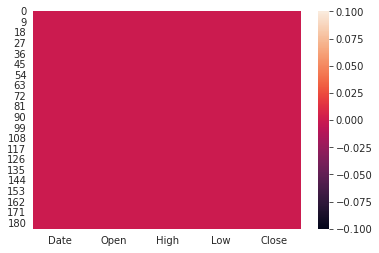

In [92]:
# Checking Null Value by plotting Heatmap
sns.heatmap(yesbank_df.isnull())

In [93]:
yesbank_df.duplicated().sum()

0

In [94]:
# Checking Unique Values for each variable.
for i in yesbank_df.columns.tolist():
  print(i,"have",yesbank_df[i].nunique(),"unique values"".")

Date have 185 unique values.
Open have 183 unique values.
High have 184 unique values.
Low have 183 unique values.
Close have 185 unique values.


In [95]:
#Creating date format and new month column

yesbank_df['date_new']=yesbank_df['Date'].apply(lambda x : datetime.strptime(x,'%b-%y'))
yesbank_df["month"]=yesbank_df["date_new"].apply(lambda x : datetime.strftime(x, '%B'))
yesbank_df["year"]=yesbank_df["date_new"].apply(lambda x : datetime.strftime(x, '%Y'))

In [96]:
yesbank_df.sample(1)

,Date,Open,High,Low,Close,date_new,month,year
45,Apr-09,10.04,17.51,9.94,15.45,2009-04-01,April,2009


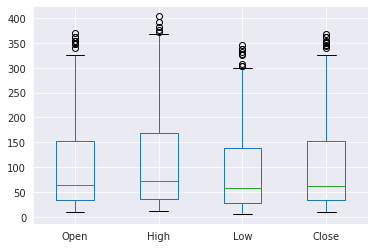

In [97]:
yesbank_df.boxplot()

In [98]:
df= yesbank_df.copy()

In [99]:
# Stock Opening mean price as on month
month_vs_open=df.groupby(['month'])["Open"].mean().reset_index()
month_vs_open

,month,Open
0,April,113.044000
1,August,108.481875
2,December,100.850000
3,February,109.134667
4,January,100.928000
5,July,103.891250
6,June,113.268000
7,March,108.150667
8,May,114.589333
9,November,97.975000


In [100]:
#  Stocks Higher mean price as on month
month_vs_high=df.groupby(['month'])["High"].mean().reset_index()
month_vs_high

,month,High
0,April,125.709333
1,August,116.064375
2,December,107.654000
3,February,116.035333
4,January,117.346667
5,July,117.493750
6,June,118.471333
7,March,123.670667
8,May,122.090000
9,November,105.645000


In [101]:
# Stocks Lower mean price as on month 
month_vs_low=df.groupby(['month'])["Low"].mean().reset_index()
month_vs_low

,month,Low
0,April,102.284667
1,August,95.777500
2,December,92.808000
3,February,98.238667
4,January,93.766000
5,July,96.206250
6,June,102.642000
7,March,98.524000
8,May,102.404667
9,November,87.251875


In [102]:
# Stocks closing mean price as on month
month_vs_close=df.groupby(['month'])["Close"].mean().reset_index()
month_vs_close

,month,Close
0,April,114.450000
1,August,103.386875
2,December,100.724000
3,February,107.760667
4,January,108.774667
5,July,108.322500
6,June,109.661333
7,March,113.014000
8,May,112.874667
9,November,94.671250


In [103]:
# stocks opening, closing, higher, lower median price as on month
df_mean=df.groupby(['month' ]).median()
df_mean

,Open,High,Low,Close
month,,,,
April,73.620,76.100,69.110,70.070
August,64.450,68.345,51.830,57.555
December,70.000,70.500,55.440,62.540
February,61.540,62.700,58.420,60.950
January,62.980,66.500,49.390,61.590
July,65.575,70.595,59.535,63.445
June,65.450,70.600,62.140,67.830
March,60.520,83.360,60.340,73.460
May,70.400,70.590,58.850,66.020


In [104]:
# Stocks open, close, high, low prices on 2005
df1=df[["Open","Close","High","Low","year"]]
year_wise=df1[df1.year=='2005']
year_wise


,Open,Close,High,Low,year
0,13.00,12.46,14.00,11.25,2005
1,12.58,13.42,14.88,12.55,2005
2,13.48,13.30,14.87,12.27,2005
3,13.20,12.99,14.47,12.40,2005
4,13.35,13.41,13.88,12.88,2005
5,13.49,13.71,14.44,13.00,2005


#Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

[Text(0.5, 1.0, 'Monthly share open mean price ')]

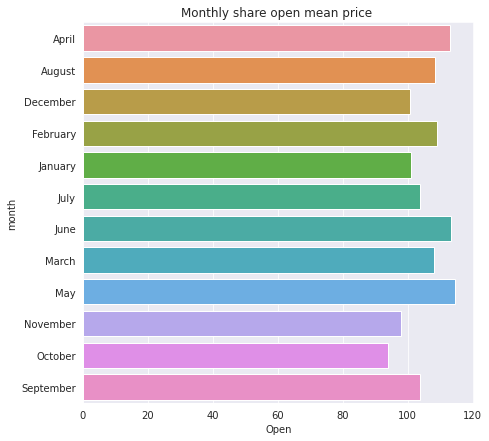

In [105]:
# Chart - 1 Month vs share open price
fig,ax=plt.subplots(figsize=(7,7))
sns.barplot(data=month_vs_open,x='Open',y='month',ax=ax,capsize=.2)
ax.set(title='Monthly share open mean price ')

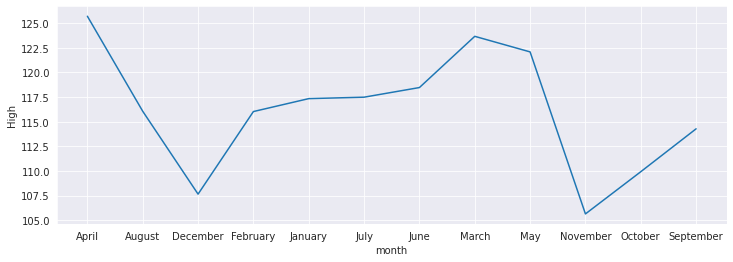

In [106]:
# Chart - 2 Month vs share high price

monthvshigh=df.groupby(['month'])['High'].mean().reset_index()
plt.figure(figsize=(12,4))
x= sns.lineplot(x = 'month',y = 'High', data = monthvshigh)
plt.show()

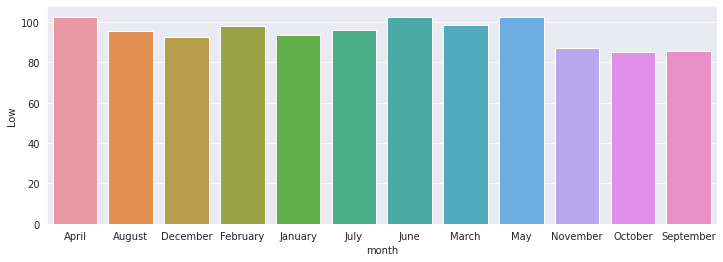

In [107]:
# Chart - 3 Month vs share Low price

monthvslow=df.groupby(['month'])['Low'].mean().reset_index()
plt.figure(figsize=(12,4))
x= sns.barplot(x = 'month',y = 'Low', data = monthvslow)
plt.show()

([<matplotlib.patches.Wedge at 0x7fc7aaac2280>,
 [Text(1.0558218010570295, 0.3086103115786816, 'April'),
  Text(0.7459051359577611, 0.8084711053289624, 'August'),
  Text(0.2593539280672331, 1.0689880916063081, 'December'),
  Text(-0.30399254164845796, 1.057160600203257, 'February'),
  Text(-0.8027753503240831, 0.752031739298313, 'January'),
  Text(-1.0750585788903373, 0.2329142588041544, 'July'),
  Text(-1.041263170971285, -0.3546420854591639, 'June'),
  Text(-0.6995566830828756, -0.8488936606867113, 'March'),
  Text(-0.14040564259078772, -1.091002408580599, 'May'),
  Text(0.41586145867973007, -1.018361059342298, 'November'),
  Text(0.8371550411966413, -0.7135624969118334, 'October'),
  Text(1.0705471437832697, -0.2528414778818611, 'September')],
 [Text(0.5759028005765614, 0.1683328972247354, '9.1%'),
  Text(0.40685734688605146, 0.4409842392703431, '8.2%'),
  Text(0.1414657789457635, 0.5830844136034408, '8.0%'),
  Text(-0.16581411362643161, 0.576633054656322, '8.5%'),
  Text(-0.4378774

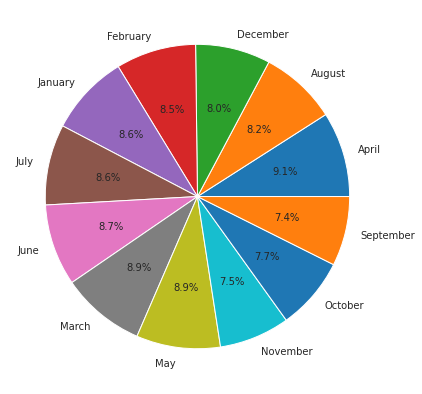

In [108]:
# Chart - 4 Close mean share with pie
plt.figure(figsize=(7,7))
plt.pie(list(month_vs_close['Close']),labels=list(month_vs_close['month'].value_counts().keys()),autopct='%0.1f%%')

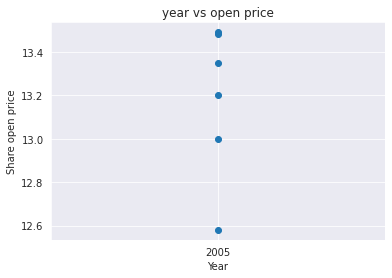

In [109]:
# Chart - 5 Share open price as on 2005
months=year_wise['year']
opens=year_wise['Open']
plt.scatter(months,opens) #creating bar plot

plt.xlabel("Year")
plt.ylabel("Share open price")
plt.title("year vs open price")
plt.show()

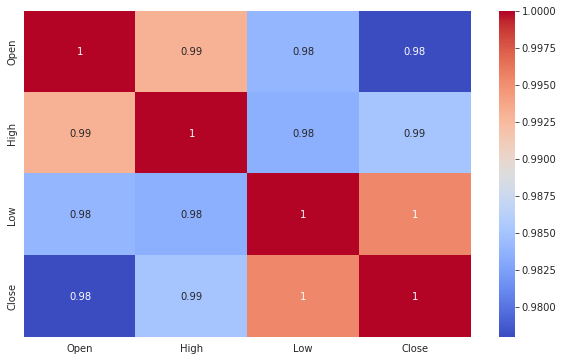

In [110]:
# Chart - 6 Correlation Heatmap visualization code

plt.figure(figsize=(10,6))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

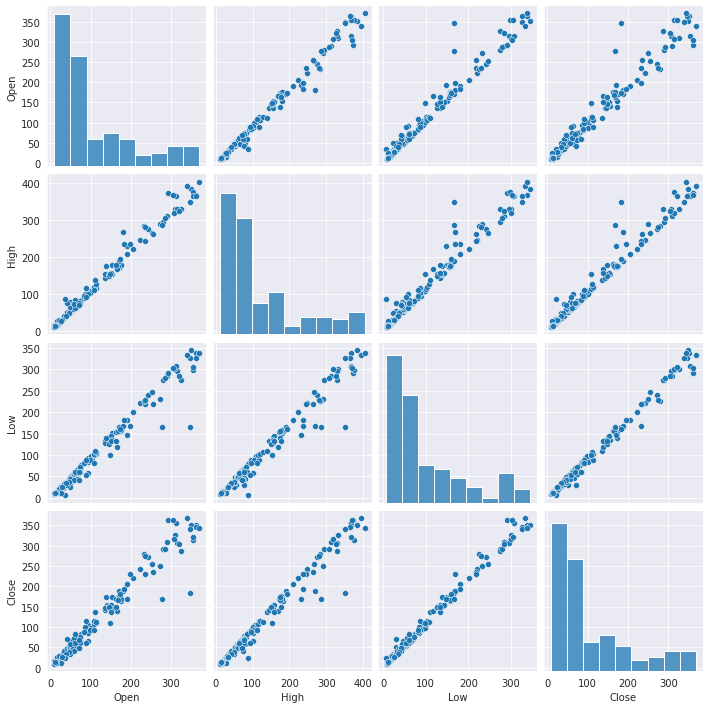

In [111]:
# Chart - 7 Pair Plot visualization code
sns.pairplot( df)

#Hypothesis Testing


In [112]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

##Hypothetical Statement - 1
Stocks Lower mean price as per months i.e. 105

Null Hypothesis: N = 105

Alternate Hypothesis : N < 105

Test Type: Left Tailed Test

In [113]:
# Getting the required parameter values for hypothesis testing
hypothesis_number = 105
sample_mean = df["Low"].mean()
size = len(df)
std=(variance(df["Low"]))**0.5

In [114]:
# Performing Statistical Test to obtain P-Value
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=df,col="Low")
# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.06695632294655507.
